In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [82]:
import numpy as np
# Load your DataFrame
df = pd.read_csv("../updated_with_cities.csv")

# Drop the 'keyword' column from the DataFrame
df = df.drop('latitude', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('house_type', axis=1)
df = df.drop('garden_size', axis=1)
df = df.drop('house_keywords', axis=1)  # replace 'keyword' with the actual column name if different
df = df.drop('Unnamed: 0', axis=1)

# Check for any remaining non-numeric data that might cause issues
print(df.head())
print(df.info())


       price  bedrooms  bathrooms neighbourhood_quality house_condition  \
0  300890.76         7          3               Alright         Abysmal   
1  272455.06         3          1              Pleasant        Pleasant   
2  172964.52         2          2              Pleasant         Alright   
3  329183.39         2          1               Alright         Alright   
4  739525.34         3          2               Alright         Alright   

     crime_rate          city  
0           Low      Scopwick  
1        Medium       Glasgow  
2  Non Existent  Winterbourne  
3          High      Hatfield  
4        Medium        Exeter  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  30000 non-null  float64
 1   bedrooms               30000 non-null  int64  
 2   bathrooms              30000 non-nul

In [83]:
# Print unique values for each categorical column
print("Unique values in 'house_condition':", df['house_condition'].unique())
print("Unique values in 'neighbourhood_quality':", df['neighbourhood_quality'].unique())
print("Unique values in 'crime_rate':", df['crime_rate'].unique())

Unique values in 'house_condition': ['Abysmal' 'Pleasant' 'Alright' 'Rough' 'Outstanding']
Unique values in 'neighbourhood_quality': ['Alright' 'Pleasant' 'Rough' 'Outstanding' 'Abysmal']
Unique values in 'crime_rate': ['Low' 'Medium' 'Non Existent' 'High' 'Very Low' 'Very High' 'Extreme']


In [84]:
# Assuming 'house_condition' is ordinal
condition_mapping = {
    'Abysmal': 1,
    'Rough': 2,
    'Pleasant': 3,
    'Alright': 4,
    'Outstanding': 5
}
df['house_condition_numeric'] = df['house_condition'].map(condition_mapping)

# Assuming 'neighbourhood_quality' is also ordinal
quality_mapping = {
    'Abysmal': 1,
    'Rough': 2,
    'Pleasant': 3,
    'Alright': 4,
    'Outstanding': 5
}
df['neighbourhood_quality_numeric'] = df['neighbourhood_quality'].map(quality_mapping)


In [85]:
# Check for any zero or negative values to avoid ValueError in log operation
if (df['price'] <= 0).any():
    print("Data contains zero or negative values. Adjust before applying log.")
else:
    df['log_price'] = np.log(df['price'])

In [86]:
# Calculate the correlation matrix including the specified columns
columns_to_include = ['price', 'bedrooms', 'bathrooms', 'house_condition_numeric', 'neighbourhood_quality_numeric']
correlation_matrix = df[columns_to_include].corr()

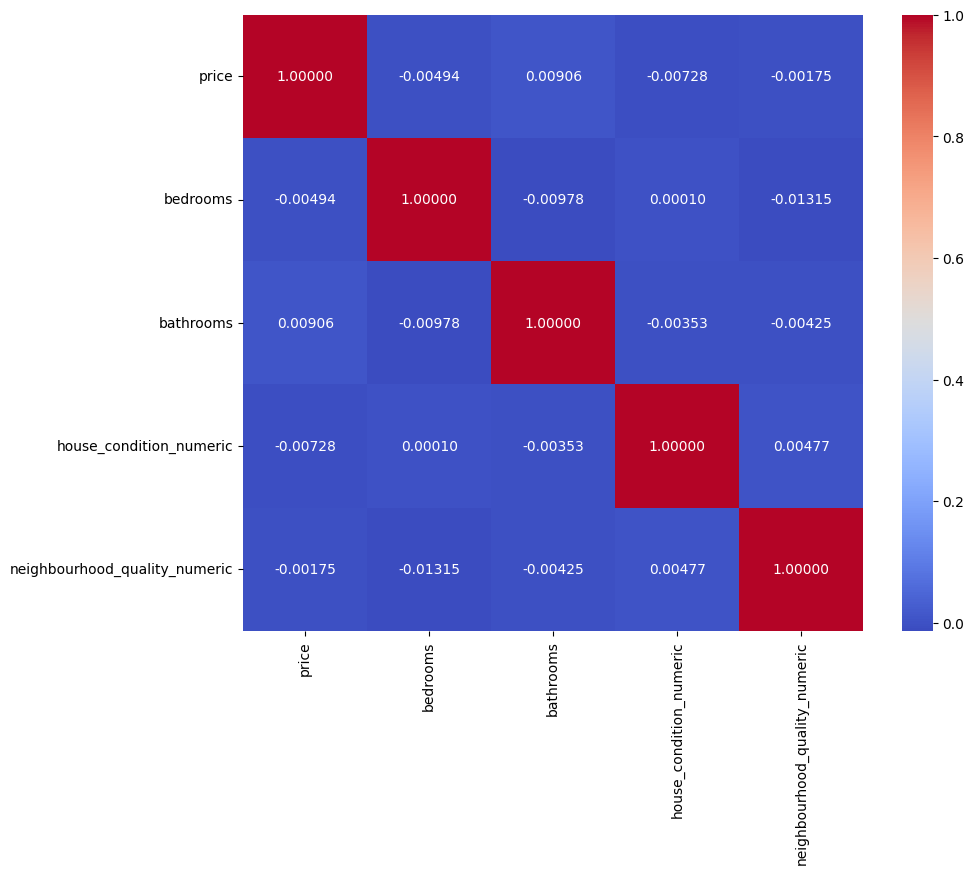

In [87]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.show()